In [5]:
## EDA Emission data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#load and read data
df = pd.read_csv("emission.csv")
df.head()

,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,1,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.284,0.319,0.338,0.377,0.378,0.369,0.371,0.303,0.358,0.344
1,2,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,0.725,0.738,0.765,0.777,0.840,0.794,0.852,0.789,0.846,0.857
3,4,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,13.804,14.110,14.616,14.120,15.358,13.728,14.273,13.838,14.121,13.067
4,5,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",ECNC,CO2 Emissions,"Environment, Climate Change, Economic Activity...",...,2.648,2.989,3.094,3.129,3.327,3.323,3.345,3.435,3.564,3.584


In [23]:
# Get general overview of data
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8910 entries, 0 to 8909
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             8910 non-null   int64  
 1   Country              8910 non-null   object 
 2   ISO2                 8910 non-null   object 
 3   ISO3                 8910 non-null   object 
 4   Indicator            8910 non-null   object 
 5   Unit                 8910 non-null   object 
 6   Source               8910 non-null   object 
 7   CTS Code             8910 non-null   object 
 8   CTS Name             8910 non-null   object 
 9   CTS Full Descriptor  8910 non-null   object 
 10  Industry             8910 non-null   object 
 11  Scale                8910 non-null   object 
 12  1995                 8910 non-null   float64
 13  1996                 8910 non-null   float64
 14  1997                 8910 non-null   float64
 15  1998                 8910 non-null   f

In [29]:
# Check for duplicates & missing values
print(f"Missing values:\n{df.isnull().sum()}")# This counts missing values. 

Missing values:
ObjectId               0
Country                0
ISO2                   0
ISO3                   0
Indicator              0
Unit                   0
Source                 0
CTS Code               0
CTS Name               0
CTS Full Descriptor    0
Industry               0
Scale                  0
1995                   0
1996                   0
1997                   0
1998                   0
1999                   0
2000                   0
2001                   0
2002                   0
2003                   0
2004                   0
2005                   0
2006                   0
2007                   0
2008                   0
2009                   0
2010                   0
2011                   0
2012                   0
2013                   0
2014                   0
2015                   0
2016                   0
2017                   0
2018                   0
dtype: int64


In [31]:
print(f"Duplicate Rows: {df.duplicated().sum()}")  # Check for duplicates

Duplicate Rows: 0


In [35]:
# Checking unique categories
print(f"Unique Countries: {df['Country'].nunique()}")
print(f"Unique Industries: {df['Industry'].nunique()}")
print(f"Unique Indicator: {df['Indicator'].nunique()}")

Unique Countries: 66
Unique Industries: 45
Unique Indicator: 3


In [65]:
# Print all unique values in the "Indicator" column
print("Unique Indicator values:")
print(df["Indicator"].unique())  # Prints the actual unique values

Unique Indicator values:
['CO2 emissions' 'CO2 emissions intensities' 'CO2 emissions multipliers']


In [45]:
#identify Year Columns 
year_columns = [col for col in df.columns if col.isdigit()]  # Extract only numerical column names

In [51]:
df_new = df.melt(id_vars=["Country", "ISO2", "ISO3", "Indicator", "Unit", "Source"], 
                     value_vars=year_columns, var_name="Year", value_name="CO2_Emissions")

# Convert Year column to integer
df_new["Year"] = df_new["Year"].astype(int)

In [57]:
df_new.head() # Checking how a reshaped df looks

,Country,ISO2,ISO3,Indicator,Unit,Source,Year,CO2_Emissions
0,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",1995,0.159
1,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",1995,0.000
2,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",1995,0.326
3,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",1995,8.914
4,Argentina,AR,ARG,CO2 emissions,Millions of Metric tons of CO2,"OECD (2021), OECD Inter-Country Input-Output D...",1995,1.957


In [59]:
# Convert Year column to integer
df_new["Year"] = df_new["Year"].astype(int)

# Check Data Types & Missing Valuesb
print(df_new.info())  # Confirm Year column is now integer


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213840 entries, 0 to 213839
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Country        213840 non-null  object 
 1   ISO2           213840 non-null  object 
 2   ISO3           213840 non-null  object 
 3   Indicator      213840 non-null  object 
 4   Unit           213840 non-null  object 
 5   Source         213840 non-null  object 
 6   Year           213840 non-null  int32  
 7   CO2_Emissions  213840 non-null  float64
dtypes: float64(1), int32(1), object(6)
memory usage: 12.2+ MB
None


In [67]:
# Pivot the data so each Indicator becomes a separate column
df_pivoted = df_new.pivot_table(index=["Country", "ISO2", "ISO3", "Year"], 
                                   columns="Indicator", 
                                   values="CO2_Emissions").reset_index()

# Rename columns for clarity
df_pivoted.columns.name = None  # Remove multi-index name
df_pivoted.rename(columns={
    "CO2 emissions": "CO2_Emissions",
    "CO2 emissions intensities": "CO2_Intensities",
    "CO2 emissions multipliers": "CO2_Multipliers"
}, inplace=True)

# Display first few rows
print(df_pivoted.head())


     Country ISO2 ISO3  Year  CO2_Emissions  CO2_Intensities  CO2_Multipliers
0  Argentina   AR  ARG  1995       1.613289       225.551540       370.174605
1  Argentina   AR  ARG  1996       1.782556       238.468344       391.881550
2  Argentina   AR  ARG  1997       1.874622       241.112698       382.866246
3  Argentina   AR  ARG  1998       1.968489       239.738661       394.364576
4  Argentina   AR  ARG  1999       1.996711       247.631642       412.650103


In [69]:
# Checking missing values
print("Missing Values:\n", df_pivoted.isnull().sum())

#  Summary statistics
print("\nSummary Statistics:")
print(df_pivoted.describe())

#  Checking unique countries
print("\nNumber of Unique Countries:", df_pivoted['Country'].nunique())


Missing Values:
 Country            0
ISO2               0
ISO3               0
Year               0
CO2_Emissions      0
CO2_Intensities    0
CO2_Multipliers    0
dtype: int64

Summary Statistics:
              Year  CO2_Emissions  CO2_Intensities  CO2_Multipliers
count  1584.000000    1584.000000      1584.000000      1584.000000
mean   2006.500000       7.176740       437.889047       749.085607
std       6.924373      20.959574       573.357091       936.447644
min    1995.000000       0.004867        43.861991        67.152483
25%    2000.750000       0.591244       190.195380       307.682100
50%    2006.500000       1.421178       289.441350       472.541681
75%    2012.250000       5.505972       484.142591       848.582904
max    2018.000000     209.426044      9239.166437     13479.350191

Number of Unique Countries: 66


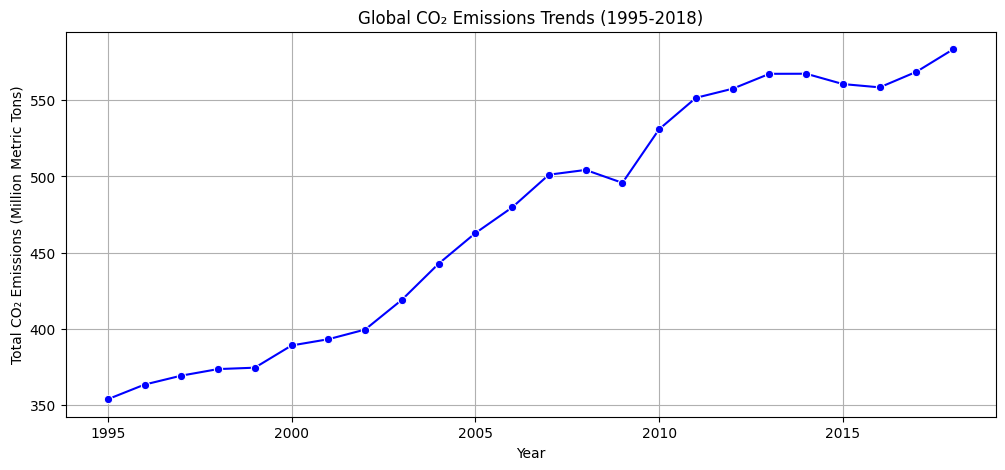

In [73]:
#  Global CO₂ Emissions Trends (1995-2018)
# Aggregate CO₂ emissions by year
df_global = df_pivoted.groupby("Year")["CO2_Emissions"].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_global, x="Year", y="CO2_Emissions", marker="o", color="b")
plt.title("Global CO₂ Emissions Trends (1995-2018)")
plt.xlabel("Year")
plt.ylabel("Total CO₂ Emissions (Million Metric Tons)")
plt.grid()
plt.show()

C:\Users\rahat\AppData\Local\Temp\ipykernel_12612\4220558448.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="Reds_r")


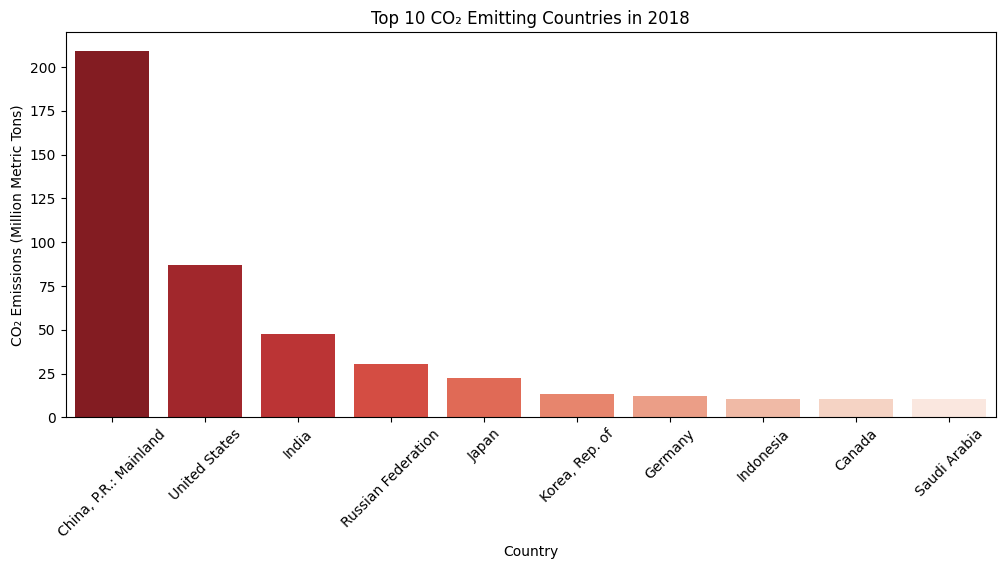

In [77]:
# Top 10 emitting countries in the most recent year
latest_year = df_pivoted["Year"].max()  # Get latest available year
df_latest = df_pivoted[df_pivoted["Year"] == latest_year]  # Filter latest year data

top_countries = df_latest.groupby("Country")["CO2_Emissions"].sum().nlargest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="Reds_r")
plt.title(f"Top 10 CO₂ Emitting Countries in {latest_year}")
plt.xlabel("Country")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.xticks(rotation=45)
plt.show()


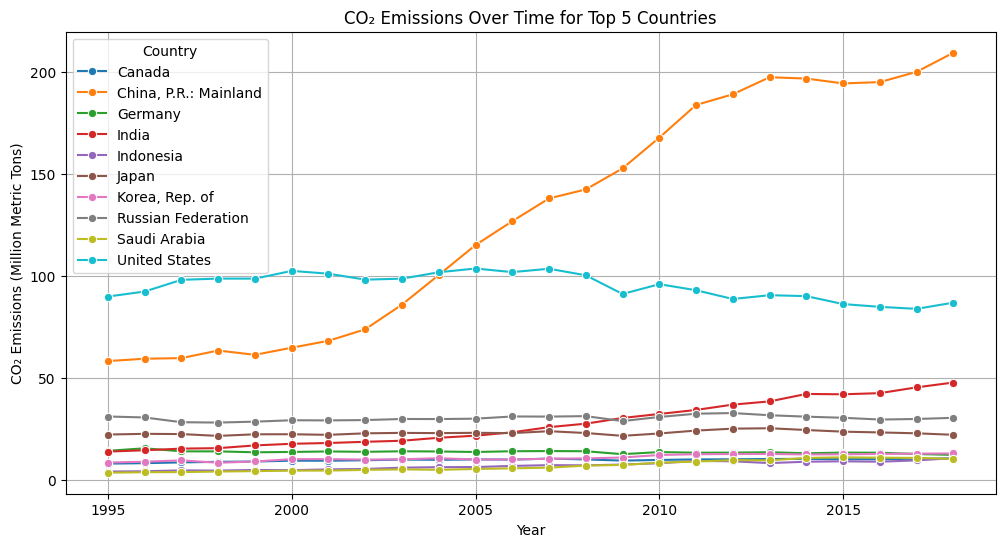

In [81]:
# CO₂ Emissions by Country Over Time
# Select top 5 emitting countries
top_emitters = top_countries.index.tolist()
df_top_emitters = df_pivoted[df_pivoted["Country"].isin(top_emitters)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_emitters, x="Year", y="CO2_Emissions", hue="Country", marker="o")
plt.title("CO₂ Emissions Over Time for Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.legend(title="Country")
plt.grid()
plt.show()


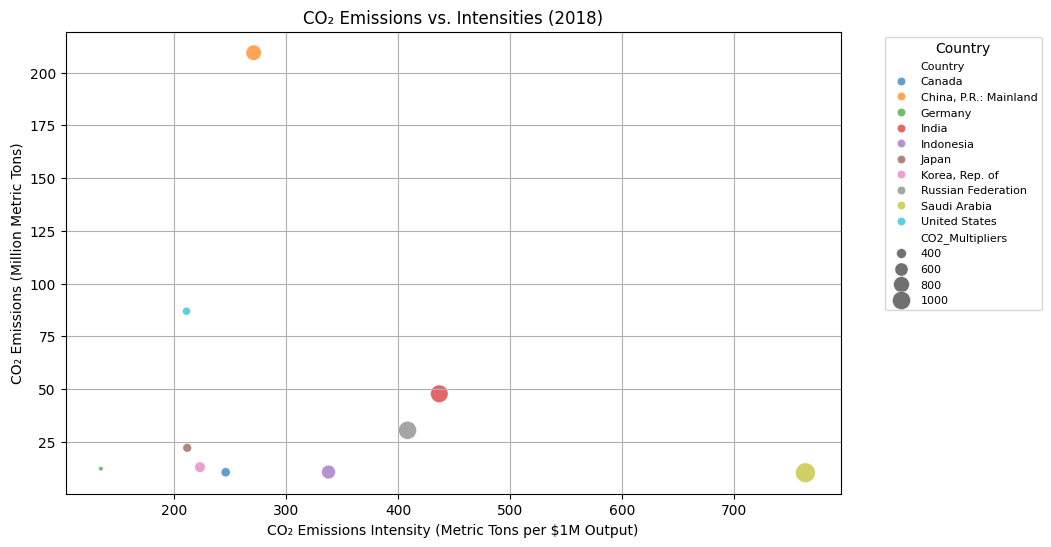

In [89]:
#CO₂ Emissions Intensity vs. Total Emissions for top ten countries 
top_countries = df_latest.groupby("Country")["CO2_Emissions"].sum().nlargest(10).index.tolist()
df_top_countries = df_latest[df_latest["Country"].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_top_countries, x="CO2_Intensities", y="CO2_Emissions", hue="Country", size="CO2_Multipliers",
    sizes=(10, 200), alpha=0.7
)

plt.title(f"CO₂ Emissions vs. Intensities ({latest_year})")
plt.xlabel("CO₂ Emissions Intensity (Metric Tons per $1M Output)")
plt.ylabel("CO₂ Emissions (Million Metric Tons)")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Country", fontsize=8)
plt.show()


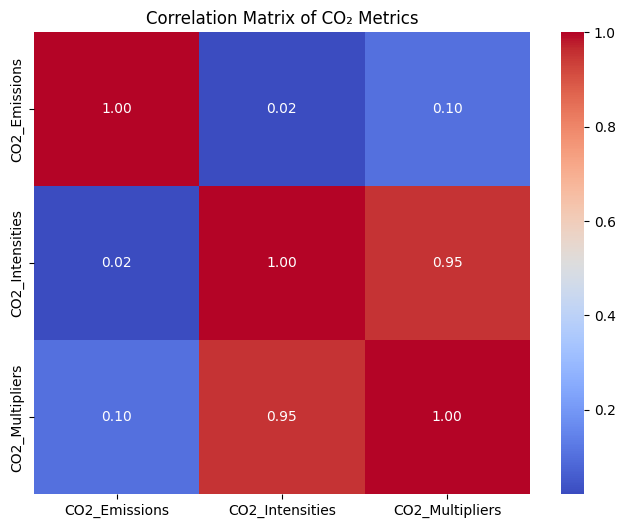

In [95]:
# Correlation Analysis


# Compute correlation matrix
correlation_matrix = df_pivoted[["CO2_Emissions", "CO2_Intensities", "CO2_Multipliers"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of CO₂ Metrics")
plt.show()


C:\Users\rahat\AppData\Local\Temp\ipykernel_12612\517270696.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_multipliers.index, y=top_multipliers.values, palette="Blues_r")


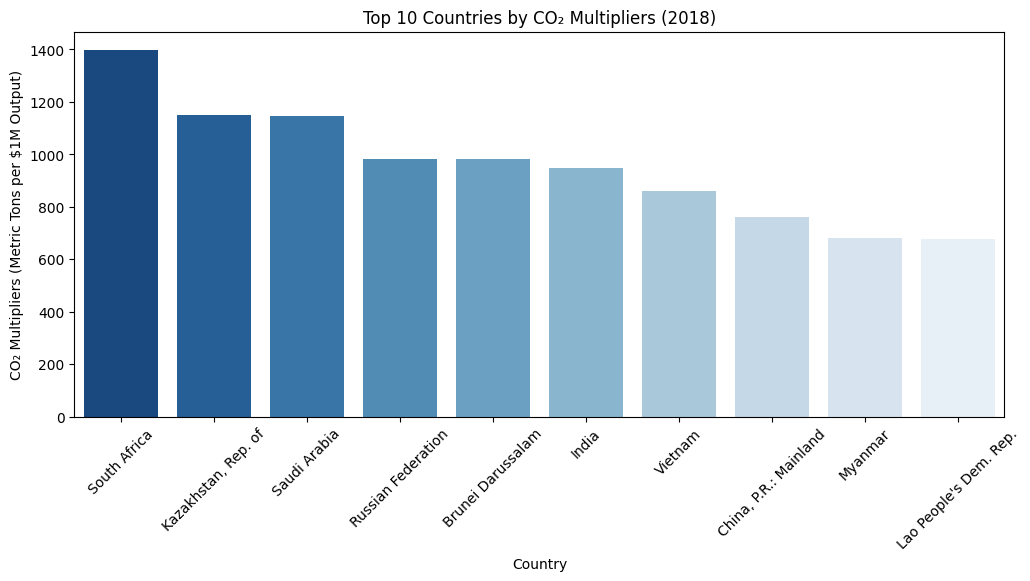

In [100]:
top_multipliers = df_latest.groupby("Country")["CO2_Multipliers"].mean().nlargest(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_multipliers.index, y=top_multipliers.values, palette="Blues_r")
plt.title(f"Top 10 Countries by CO₂ Multipliers ({latest_year})")
plt.xlabel("Country")
plt.ylabel("CO₂ Multipliers (Metric Tons per $1M Output)")
plt.xticks(rotation=45)
plt.show()


## Definition of CO₂ Multipliers
#CO₂ multipliers are calculated using the Leontief inverse matrix from the OECD Inter-Country Input-Output (ICIO) Tables. They show the total CO₂ emissions generated across the entire supply chain due to an increase in output from a specific industry.

#In simple terms:

#Direct emissions → Emissions from fuel combustion within an industry.
#Indirect emissions → Emissions caused by upstream and downstream supply chain activities.
#CO₂ Multiplier = Total direct + indirect emissions per unit of economic output.
#🔹 Formula (from OECD methodology):

#CO₂ Multiplier = 𝐿 × 𝐸

#where:

#L = Leontief inverse (output multipliers matrix)
#E = CO₂ emission intensities (direct emissions per unit output)#

In [106]:
#Building an interactive dashboard

!pip install streamlit pandas plotly


In [122]:
%%writefile app.py
import streamlit as st
import pandas as pd
import plotly.express as px

# Load the dataset
@st.cache_data
def load_data():
    file_path = "emission.csv"  # Update this path if needed
    df = pd.read_csv(file_path)

    # Identify year columns
    year_columns = [col for col in df.columns if col.isdigit()]

    # Convert to long format
    df_melted = df.melt(id_vars=["Country", "ISO2", "ISO3", "Indicator"], 
                         value_vars=year_columns, var_name="Year", value_name="CO2_Emissions")
    
    df_melted["Year"] = df_melted["Year"].astype(int)

    # Pivot to separate indicators
    df_pivoted = df_melted.pivot_table(index=["Country", "ISO2", "ISO3", "Year"], 
                                       columns="Indicator", values="CO2_Emissions").reset_index()

    # Rename columns
    df_pivoted.columns.name = None
    df_pivoted.rename(columns={
        "CO2 emissions": "CO2_Emissions",
        "CO2 emissions intensities": "CO2_Intensities",
        "CO2 emissions multipliers": "CO2_Multipliers"
    }, inplace=True)

    return df_pivoted

df = load_data()

# Streamlit UI
st.title("🌍 Interactive CO₂ Emissions Dashboard")
st.sidebar.header("Filter Options")

# Dropdown filters
selected_year = st.sidebar.slider("Select Year", min_value=int(df["Year"].min()), max_value=int(df["Year"].max()), value=int(df["Year"].max()))
selected_country = st.sidebar.selectbox("Select Country", ["All"] + sorted(df["Country"].unique()))

# Filter data
df_filtered = df[df["Year"] == selected_year]
if selected_country != "All":
    df_filtered = df_filtered[df_filtered["Country"] == selected_country]

# Total CO₂ Emissions Over Time
fig1 = px.line(df.groupby("Year")["CO2_Emissions"].sum().reset_index(),
               x="Year", y="CO2_Emissions", title="Global CO₂ Emissions Over Time",
               markers=True)
st.plotly_chart(fig1, use_container_width=True)

# Top 10 CO₂ Emitting Countries
top_countries = df_filtered.groupby("Country")["CO2_Emissions"].sum().nlargest(10)
fig2 = px.bar(top_countries, x=top_countries.index, y=top_countries.values,
              title=f"Top 10 CO₂ Emitting Countries in {selected_year}", labels={"y": "CO₂ Emissions"})
st.plotly_chart(fig2, use_container_width=True)

# Scatter Plot: CO₂ Emissions vs Intensities
fig3 = px.scatter(df_filtered, x="CO2_Intensities", y="CO2_Emissions",
                  size="CO2_Multipliers", color="Country", hover_name="Country",
                  title=f"CO₂ Emissions vs Intensities in {selected_year}",
                  labels={"CO2_Intensities": "CO₂ Intensities (Metric Tons per $1M Output)",
                          "CO2_Emissions": "CO₂ Emissions (Million Metric Tons)"})
st.plotly_chart(fig3, use_container_width=True)

# Heatmap for CO₂ Multipliers by Country
fig4 = px.choropleth(df_filtered, locations="ISO3", color="CO2_Multipliers",
                     hover_name="Country", color_continuous_scale="Blues",
                     title=f"CO₂ Multipliers by Country in {selected_year}")
st.plotly_chart(fig4, use_container_width=True)

# Correlation Matrix
st.write("### Correlation Matrix of CO₂ Metrics")
st.dataframe(df_filtered[["CO2_Emissions", "CO2_Intensities", "CO2_Multipliers"]].corr())

# Footer
st.write("Developed by Rahat Sabyrbekov - Data Science Portfolio")


Overwriting app.py


In [120]:
# Now go to the bash and type streamlit run app.py
